In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(f'yob{year}.txt', names=['Name', 'Sex', 'Count'])
names_all = pd.concat(names_by_year).reset_index(level=1, drop=True)

Text(0.5, 1.0, 'Распределение имён Роберт и Рут')

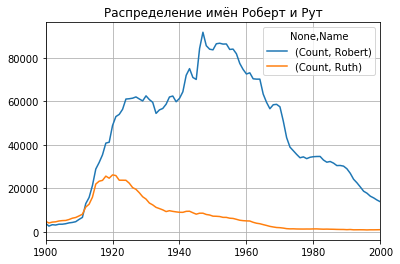

In [9]:
df = names_all[(names_all['Name']).isin(['Ruth', 'Robert'])]
names1 = df.groupby([df.index, 'Name']).sum().unstack(1)
names1.plot().grid()
plt.title('Распределение имён Роберт и Рут')

Text(0.5, 1.0, 'Распределение имён Роберт и Рут')

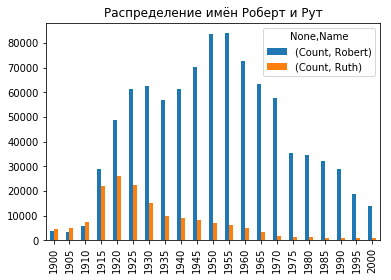

In [11]:
names2 = names1.loc[(names1.index.get_level_values(0).isin([x for x in names1.index if x%5 == 0]))]
names2.plot(kind='bar')
plt.title('Распределение имён Роберт и Рут')

Text(0.5, 1.0, 'ТОП-10 популярных имен начинающихся с буквы R\nза 1950 год')

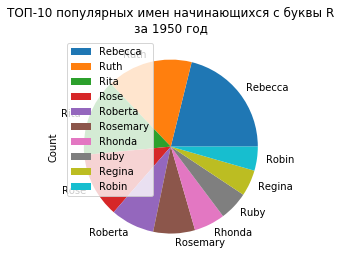

In [15]:
names3 = pd.read_csv('yob1950.txt', names=['Name', 'Sex', 'Count'])
df = names3[names3['Name'].str.startswith('R')]
a1 = df.set_index('Name')[:10]
a1.plot(kind='pie', y='Count')
plt.title('ТОП-10 популярных имен начинающихся с буквы R\nза 1950 год')

In [2]:
list_frames = []
for year in range(1900, 2001):
    frame = pd.read_csv(f'yob{year}.txt', names=['Name', 'Sex', 'Count'])
    list_frames.append(frame)
df = pd.concat(list_frames, ignore_index=True)
#df = pd.concat(list_frames)
names = df.groupby('Name').sum()

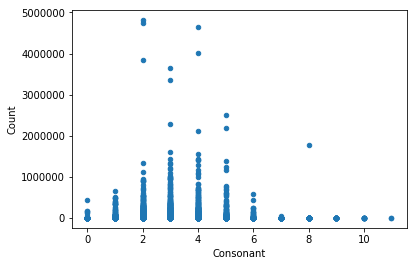

In [3]:
names['Consonant'] = names.index.get_level_values(0).str.count(r'[RTPDFGHKLZXCVBNMrtpsdfghklzxcvbnm]')
names.plot(kind='scatter', x='Consonant', y='Count')

In [3]:
import seaborn as sns
sns.set()

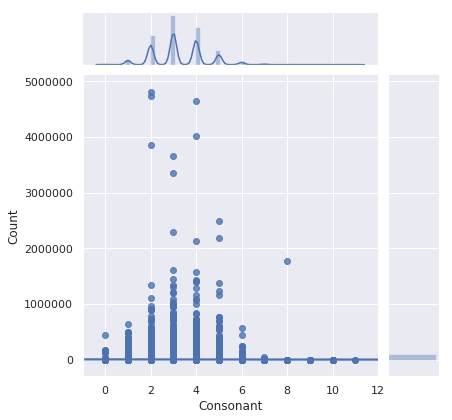

In [7]:
sns.jointplot("Consonant", "Count", data=names, kind='reg')